<a href="https://colab.research.google.com/github/Vamsi-027/Warfin-Dose-Prediction/blob/main/Final_Project_Warfarin_Dosing_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Final Project (Option 1): End-to-End ML pipeline for Warfarin Dosing Prediction**

### **Data Preprocessing**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/My Drive/ML_Project_Warfarin_Dose_Prediction/Final_Project/Warfarin Dosing Prediction Dataset.xlsx'

**Import Necessary Libraries**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns
from joblib import dump, load
import matplotlib.pyplot as plt

**Load the Dataset**

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_excel(file_path)

In [ ]:
print(data.head())

   Gender Race (Reported)      Age  Height (cm)  Weight (kg)  Diabetes  \
0    male           White  60 - 69      193.040        115.7       NaN   
1  female           White  50 - 59      176.530        144.2       NaN   
2  female           White  40 - 49      162.560         77.1       NaN   
3    male           White  60 - 69      182.245         90.7       NaN   
4    male           White  50 - 59      167.640         72.6       NaN   

   Simvastatin (Zocor)  Amiodarone (Cordarone)  Target INR  \
0                  0.0                     0.0         2.5   
1                  0.0                     0.0         2.5   
2                  0.0                     0.0         2.5   
3                  0.0                     0.0         2.5   
4                  0.0                     0.0         2.5   

   Therapeutic Dose of Warfarin  INR on Reported Therapeutic Dose of Warfarin  \
0                          49.0                                          2.60   
1                   

In [ ]:
data['Race (Reported)'].unique()

array(['White', 'Other Mixed Race', 'African-American', 'Black',
       'Hispanic', 'Japanese', 'Han Chinese', 'other', nan, 'Asian',
       'Korean', 'Caucasian', 'Black or African American', 'Other',
       'Intermediate', 'Malay', 'Chinese', 'Indian', 'Black Caribbean',
       'Other (Hungarian)', 'Other (Black British)', 'Black African',
       'Black other'], dtype=object)

In [ ]:
data['Gender'].unique()

array(['male', 'female', nan], dtype=object)

**Visualizing the Original Dataset**

In [ ]:
# Data Visualization
def data_visualization(df):
    # Plot distribution of target variable
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Therapeutic Dose of Warfarin'], kde=True, bins=20)
    plt.title("Distribution of Therapeutic Dose of Warfarin")
    plt.xlabel("Therapeutic Dose of Warfarin")
    plt.ylabel("Frequency")
    plt.show()

    # Pairplot of numerical features
    sns.pairplot(df[['Height (cm)', 'Weight (kg)', 'Target INR', 'Therapeutic Dose of Warfarin']])
    plt.show()

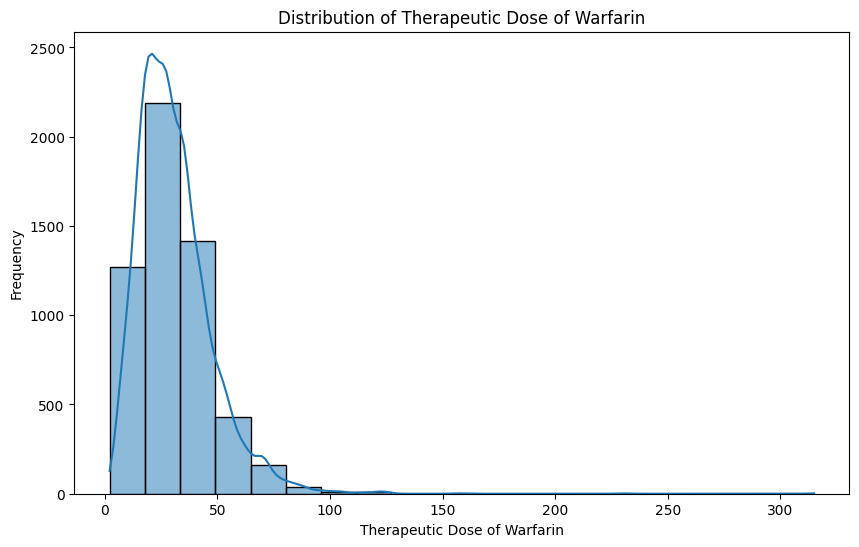

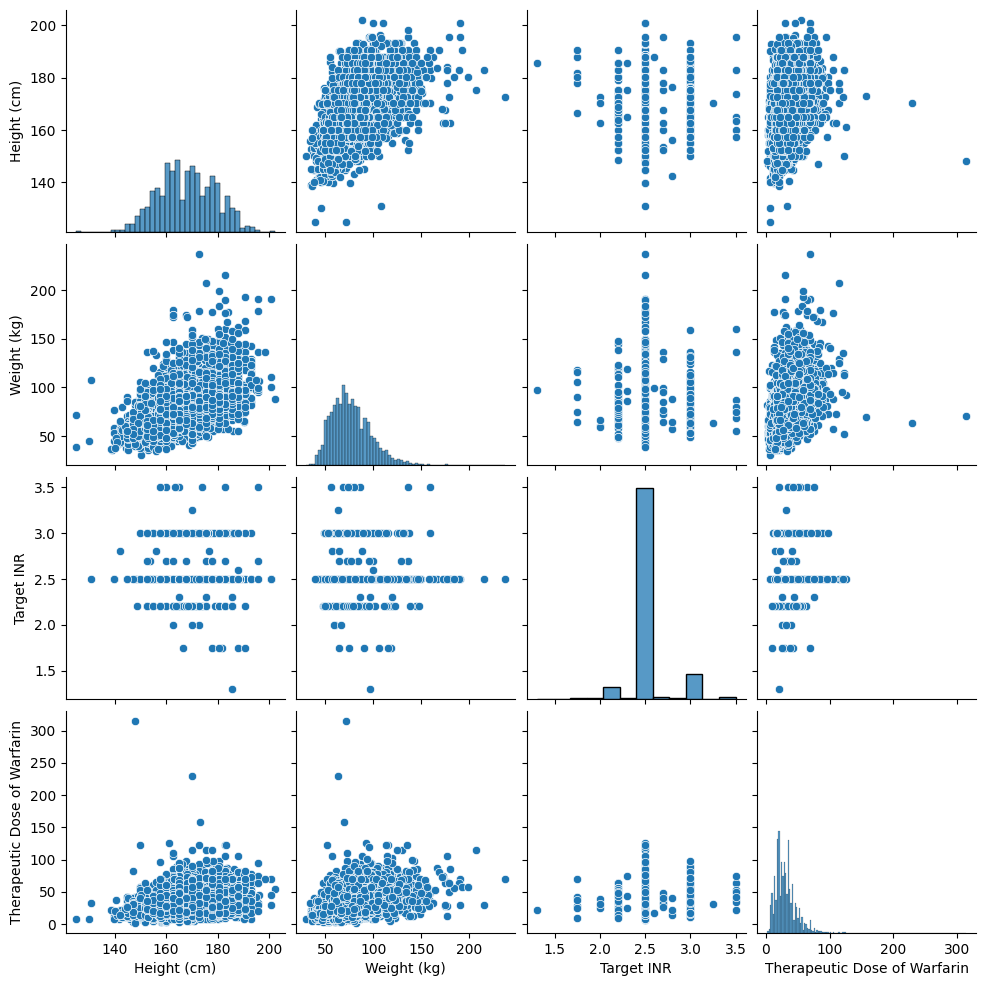

In [ ]:
# Visualize data
data_visualization(data)

**Plot Analysis**

From the distribution plot of the therapeutic dose of warfarin, we see that most patients require doses between 10 to 50 mg/week, indicating a typical dose range for the majority. However, the plot also shows a long tail on the right, meaning a few patients require much higher doses, which are considered outliers. These outliers might be due to unique characteristics like genetic factors, medical conditions, or other demographic variables that influence dose requirements. This highlights the variability in how patients respond to warfarin.

The pairplot helps us explore relationships between important variables like height, weight, and the therapeutic dose. For example, taller and heavier patients often require slightly higher doses, which aligns with the expectation that body size affects drug metabolism. However, the relationships between the features and the dose are not perfectly linear, and some features like the INR target appear less variable, with most values clustering around 2.5. This suggests that some features are more influential than others, and proper data processing is needed to fully leverage their predictive power.

**KNN Model**

For the therapeutic dose prediction problem, we will first implement the k-Nearest Neighbors (kNN) regressor to predict the dose for new patients. This model works by identifying the most similar patients in the dataset (the "neighbors") based on clinical and demographic features such as height, weight, and INR target. It then predicts the therapeutic dose as the average of the doses required by these similar patients. Since the dataset contains mixed features with different scales (e.g., height in cm and weight in kg), we will normalize the data to ensure all features contribute equally to the distance calculations.

### **KNN Regression Model**

In [ ]:
# Step 1: Data Preprocessing
# Selecting relevant features for the analysis
selected_features = [
    "Gender",
    "Race (Reported)",
    "Age",
    "Height (cm)",
    "Weight (kg)",
    "Diabetes",
    "Simvastatin (Zocor)",
    "Amiodarone (Cordarone)",
    "Target INR",
]

In [ ]:
# Define the target variable
target_variable = "Therapeutic Dose of Warfarin"

In [ ]:
# Clean the dataset
data = data[selected_features + [target_variable]].dropna(subset=[target_variable])

In [ ]:
# Encode categorical variables
categorical_cols = ["Gender", "Race (Reported)", "Age"]
for col in categorical_cols:
    encoder = LabelEncoder()
    data[col] = encoder.fit_transform(data[col])

In [ ]:
print("Features in X:", X.columns.tolist())
print("Shape of X:", X.shape)

Features in X: ['Gender', 'Race (Reported)', 'Age', 'Height (cm)', 'Weight (kg)', 'Diabetes', 'Simvastatin (Zocor)', 'Amiodarone (Cordarone)', 'Target INR']
Shape of X: (5528, 9)


In [ ]:
print("Features in X:", X.columns)

Features in X: Index(['Gender', 'Race (Reported)', 'Age', 'Height (cm)', 'Weight (kg)',
       'Diabetes', 'Simvastatin (Zocor)', 'Amiodarone (Cordarone)',
       'Target INR'],
      dtype='object')


In [ ]:
# Step 2: Split the dataset into training and testing sets
X = data[selected_features]
y = data[target_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 3: Handle missing values and normalize features
# Impute missing values
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [ ]:
print(f"Shape of X_train before scaling: {X_train.shape}")
print(f"Columns in X_train: {X.columns}")

Shape of X_train before scaling: (4422, 9)
Columns in X_train: Index(['Gender', 'Race (Reported)', 'Age', 'Height (cm)', 'Weight (kg)',
       'Diabetes', 'Simvastatin (Zocor)', 'Amiodarone (Cordarone)',
       'Target INR'],
      dtype='object')


In [ ]:
# Normalize the features
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

In [ ]:
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
print(f"Scaler fitted with {scaler.n_features_in_} features")

Scaler fitted with 9 features


In [ ]:
print(f"Training features: {selected_features}")
print(f"Features in X_train: {X.columns.tolist()}")

Training features: ['Gender', 'Race (Reported)', 'Age', 'Height (cm)', 'Weight (kg)', 'Diabetes', 'Simvastatin (Zocor)', 'Amiodarone (Cordarone)', 'Target INR']
Features in X_train: ['Gender', 'Race (Reported)', 'Age', 'Height (cm)', 'Weight (kg)', 'Diabetes', 'Simvastatin (Zocor)', 'Amiodarone (Cordarone)', 'Target INR']


In [ ]:
# Step 4: Perform Cross-Validation for the Initial Model
initial_knn = KNeighborsRegressor()  # Initial model with default hyperparameters
cv_mse_scores = cross_val_score(initial_knn, X_train_normalized, y_train, cv=10, scoring='neg_mean_squared_error')
cv_mae_scores = cross_val_score(initial_knn, X_train_normalized, y_train, cv=10, scoring='neg_mean_absolute_error')
cv_r2_scores = cross_val_score(initial_knn, X_train_normalized, y_train, cv=10, scoring='r2')

In [ ]:
cv_mse_scores = -cv_mse_scores
cv_mae_scores = -cv_mae_scores
print(cv_mae_scores)

[10.53968675 11.7480338  11.16299114 10.6450991  11.35117744 11.38463659
 11.85676858 12.47236458 10.83465675  9.39344473]


In [ ]:
print("\n10-Fold Cross-Validation Results for Initial Model:")
print(f"Mean MSE: {cv_mse_scores.mean():.2f} ± {cv_mse_scores.std():.2f}")
print(f"Mean MAE: {cv_mae_scores.mean():.2f} ± {cv_mae_scores.std():.2f}")
print(f"Mean R²: {cv_r2_scores.mean():.2f} ± {cv_r2_scores.std():.2f}")


10-Fold Cross-Validation Results for Initial Model:
Mean MSE: 249.69 ± 94.11
Mean MAE: 11.14 ± 0.81
Mean R²: 0.15 ± 0.07


In [ ]:
# Step 5: Train the initial model
initial_knn.fit(X_train_normalized, y_train)

KNeighborsRegressor()

In [ ]:
# Step 5: Evaluate the initial model
train_predictions_initial = initial_knn.predict(X_train_normalized)
test_predictions_initial = initial_knn.predict(X_test_normalized)

In [ ]:
train_mse_initial = mean_squared_error(y_train, train_predictions_initial)
test_mse_initial = mean_squared_error(y_test, test_predictions_initial)

In [ ]:
train_mae_initial = mean_absolute_error(y_train, train_predictions_initial)
test_mae_initial = mean_absolute_error(y_test, test_predictions_initial)

In [ ]:
train_r2_initial = r2_score(y_train, train_predictions_initial)
test_r2_initial = r2_score(y_test, test_predictions_initial)

In [ ]:
print("Initial Model Performance:")
print(f"Training MAE: {train_mae_initial:.2f},Training MSE: {train_mse_initial:.2f},Training R²: {train_r2_initial:.2f}")
print(f"Testing MAE: {test_mae_initial:.2f},Testing MSE: {test_mse_initial:.2f},Testing R²: {test_r2_initial:.2f}")

Initial Model Performance:
Training MAE: 9.11,Training MSE: 166.97,Training R²: 0.43
Testing MAE: 10.50,Testing MSE: 200.73,Testing R²: 0.18


In [ ]:
# Step 6: Check for overfitting or underfitting
if train_mse_initial < test_mse_initial and abs(train_mse_initial - test_mse_initial) > 10:
    print("The initial model is likely overfitting.")
elif train_mse_initial > 100 and test_mse_initial > 100:
    print("The initial model is likely underfitting.")
else:
    print("The initial model is well-balanced.")

The initial model is likely overfitting.


In [ ]:
# Visualization: Training vs Testing Errors for Initial Model (Across K Values)
neighbors = range(1, 21)
train_errors = []
test_errors = []

for k in neighbors:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_normalized, y_train)
    train_errors.append(mean_squared_error(y_train, knn.predict(X_train_normalized)))
    test_errors.append(mean_squared_error(y_test, knn.predict(X_test_normalized)))

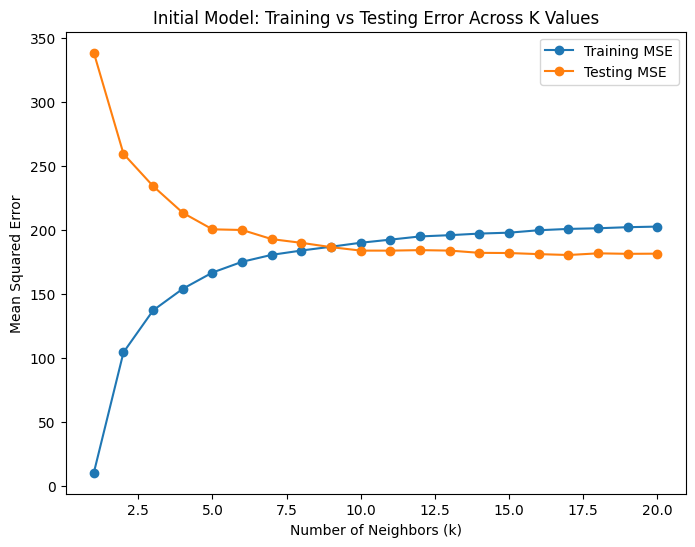

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(neighbors, train_errors, label="Training MSE", marker="o")
plt.plot(neighbors, test_errors, label="Testing MSE", marker="o")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Mean Squared Error")
plt.title("Initial Model: Training vs Testing Error Across K Values")
plt.legend()
plt.show()

From the graph and the scores, we can observe that the training error (blue line) is consistently lower than the testing error (orange line), particularly for lower values of k. This indicates that the initial model is overfitting, meaning it is performing well on the training data but struggling to generalize to unseen test data. The performance metrics also reflect this: the training MSE and R² values (166.97 and 0.43, respectively) show that the model explains the variance in the training set reasonably well. However, the higher testing MSE (200.73) and low R² (0.18) suggest the model is not capturing patterns effectively for the testing set.

To improve the model's performance, we will perform hyperparameter tuning using techniques like GridSearchCV to find the optimal values for parameters like the number of neighbors (k) and weighting strategies (uniform or distance). This will help in reducing the testing error and achieving better generalization.

In [ ]:
# Step 6: Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

In [ ]:
grid_search = GridSearchCV(estimator=KNeighborsRegressor(), param_grid=param_grid, cv=10, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train_normalized, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
# Retrieve the best model and hyperparameters
best_knn_model = grid_search.best_estimator_
print("Best Hyperparameters: ", grid_search.best_params_)

Best Hyperparameters:  {'n_neighbors': 9, 'weights': 'uniform'}


In [ ]:
# Step 7: Evaluate the tuned model
train_predictions_tuned = best_knn_model.predict(X_train_normalized)
test_predictions_tuned = best_knn_model.predict(X_test_normalized)

In [ ]:
train_mse_tuned = mean_squared_error(y_train, train_predictions_tuned)
test_mse_tuned = mean_squared_error(y_test, test_predictions_tuned)

In [ ]:
train_mae_tuned = mean_absolute_error(y_train, train_predictions_tuned)
test_mae_tuned = mean_absolute_error(y_test, test_predictions_tuned)

In [ ]:
train_r2_tuned = r2_score(y_train, train_predictions_tuned)
test_r2_tuned = r2_score(y_test, test_predictions_tuned)

In [ ]:
print("\nTuned Model Performance:")
print(f"Training MAE: {train_mae_tuned:.2f},Training MSE: {train_mse_tuned:.2f},Training R²: {train_r2_tuned:.2f}")
print(f"Testing MAE: {test_mae_tuned:.2f},Testing MSE: {test_mse_tuned:.2f},Testing R²: {test_r2_tuned:.2f}")


Tuned Model Performance:
Training MAE: 9.61,Training MSE: 187.15,Training R²: 0.36
Testing MAE: 10.11,Testing MSE: 186.82,Testing R²: 0.24


In [ ]:
# Step 9: Check for overfitting or underfitting
print("\nChecking for Overfitting or Underfitting...")
if train_mse_tuned < test_mse_tuned and abs(train_mse_tuned - test_mse_tuned) > 10:
    print("The tuned model is likely overfitting (large gap between training and testing errors).")
elif train_mse_tuned > 100 and test_mse_tuned > 100:
    print("The tuned model is likely underfitting (high training and testing errors).")
else:
    print("The tuned model is well-balanced (training and testing errors are close).")


Checking for Overfitting or Underfitting...
The tuned model is likely underfitting (high training and testing errors).


In [ ]:
# Visualization: Training vs Testing Errors for Tuned Model Across K Values
neighbors = range(1, 21)  # Range of k values to test
train_errors = []
test_errors = []

# Iterate over different values of k
for k in neighbors:
    knn = KNeighborsRegressor(n_neighbors=k, weights='distance')
    knn.fit(X_train_normalized, y_train)
    train_errors.append(mean_squared_error(y_train, knn.predict(X_train_normalized)))
    test_errors.append(mean_squared_error(y_test, knn.predict(X_test_normalized)))

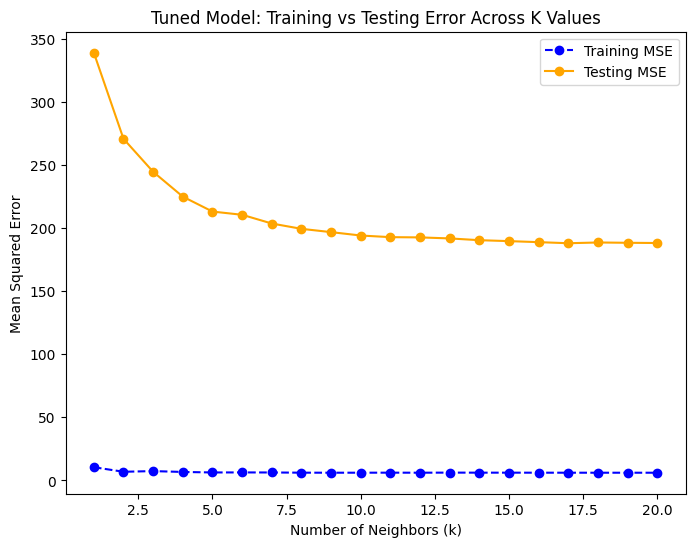

In [ ]:
# Plot the errors
plt.figure(figsize=(8, 6))
plt.plot(neighbors, train_errors, label="Training MSE", marker="o", linestyle="--", color="blue")
plt.plot(neighbors, test_errors, label="Testing MSE", marker="o", linestyle="-", color="orange")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Mean Squared Error")
plt.title("Tuned Model: Training vs Testing Error Across K Values")
plt.legend()
plt.show()


From the plot and the scores, we observe that both the training error (blue line) and testing error (orange line) are relatively high, with the testing error consistently higher than the training error across different values of k. This indicates that the model struggles to fit the training data properly (high training error) and does not generalize well to unseen data (high testing error). The tuned model's metrics—such as Training MSE: 187.15 and Testing MSE: 186.82—are very similar, which suggests that the model is not complex enough to capture the patterns in the data, leading to underfitting

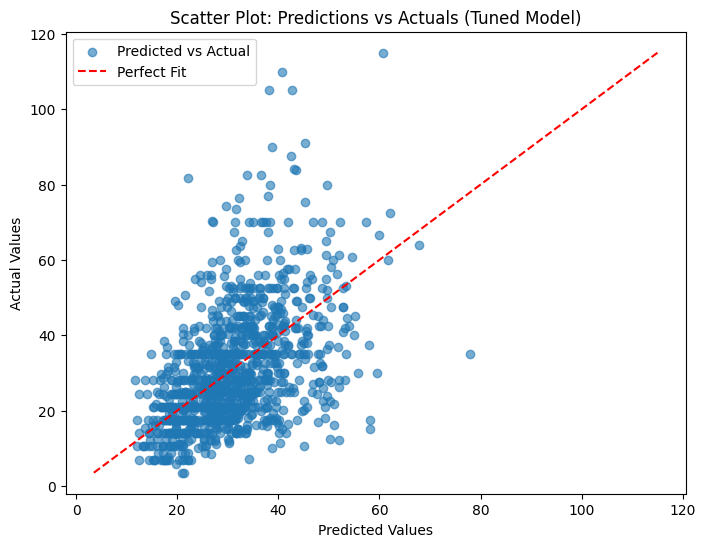

In [ ]:
# Step 9: Visualize predictions vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(test_predictions_tuned, y_test, alpha=0.6, label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label="Perfect Fit")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Scatter Plot: Predictions vs Actuals (Tuned Model)")
plt.legend()
plt.show()

We will improve the tuned model's performance by introducing technique to help it better capture patterns in the data. First, we will add interaction terms and polynomial features to enable the model to understand more complex relationships between variables, such as how "Height" and "Weight" together influence the outcome. Then, we will apply Principal Component Analysis (PCA) to reduce the number of features by retaining only the most important ones, which will help remove noise and improve the model's efficiency. We will also expand the range of hyperparameters for the KNN algorithm by testing more values for the number of neighbors (k) and experimenting with different distance metrics like Euclidean and Manhattan. Finally, we will evaluate the improved model, visualize its training and testing performance, and ensure it is better at identifying meaningful patterns and generalizing to unseen data.

Improving the KNN performance

In [ ]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# Step 1: Feature Engineering (Add Interaction and Polynomial Features)
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train_normalized)
X_test_poly = poly.transform(X_test_normalized)

print(f"Original Features: {X_train_normalized.shape[1]}, New Features (Polynomial): {X_train_poly.shape[1]}")

Original Features: 9, New Features (Polynomial): 45


In [ ]:
# Save the PolynomialFeatures transformer
dump(poly, 'poly_transformer.joblib')
print("PolynomialFeatures transformer saved as 'poly_transformer.joblib'")

PolynomialFeatures transformer saved as 'poly_transformer.joblib'


In [ ]:
# Step 2: Normalize the data after PolynomialFeatures transformation
scaler_knn = MinMaxScaler()
X_train_scaled = scaler_knn.fit_transform(X_train_poly)
X_test_scaled = scaler_knn.transform(X_test_poly)

print(f"Feature scaling applied after polynomial expansion.")

Feature scaling applied after polynomial expansion.


In [ ]:
# Step 2: Dimensionality Reduction with PCA
# Retain 95% of the variance in the data
pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train_poly)
X_test_pca = pca.transform(X_test_poly)

print(f"Reduced Features after PCA: {X_train_pca.shape[1]}")

Reduced Features after PCA: 10


In [ ]:
# Save the scaler
dump(scaler_knn, 'scaler_knn.joblib')
print("Scaler saved as 'scaler_knn.joblib'")

Scaler saved as 'scaler_knn.joblib'


In [ ]:
# Step 3: Expand Hyperparameter Search Space for KNN
param_grid = {
    'n_neighbors': range(1, 51),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

In [ ]:
# Step 4: Use GridSearchCV for Hyperparameter Tuning
knn = KNeighborsRegressor()
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=10,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    return_train_score=True
)
grid_search.fit(X_train_pca, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': range(1, 51),
                         'weights': ['uniform', 'distance']},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
# Retrieve the best model and hyperparameters
best_knn_model = grid_search.best_estimator_
print("\nBest Hyperparameters: ", grid_search.best_params_)


Best Hyperparameters:  {'metric': 'euclidean', 'n_neighbors': 30, 'weights': 'uniform'}


In [ ]:
# Step 5: Evaluate the Tuned Model
train_predictions_tuned = best_knn_model.predict(X_train_pca)
test_predictions_tuned = best_knn_model.predict(X_test_pca)

In [ ]:
train_mse_tuned = mean_squared_error(y_train, train_predictions_tuned)
test_mse_tuned = mean_squared_error(y_test, test_predictions_tuned)

In [ ]:
train_mae_tuned = mean_absolute_error(y_train, train_predictions_tuned)
test_mae_tuned = mean_absolute_error(y_test, test_predictions_tuned)

In [ ]:
train_r2_tuned = r2_score(y_train, train_predictions_tuned)
test_r2_tuned = r2_score(y_test, test_predictions_tuned)

In [ ]:
print("\nImproved Tuned Model Performance:")
print(f"Training MAE: {train_mae_tuned:.2f},Training MSE: {train_mse_tuned:.2f},Training R²: {train_r2_tuned:.2f}")
print(f"Testing MAE: {test_mae_tuned:.2f},Testing MSE: {test_mse_tuned:.2f},Testing R²: {test_r2_tuned:.2f}")


Improved Tuned Model Performance:
Training MAE: 10.14,Training MSE: 209.85,Training R²: 0.28
Testing MAE: 10.02,Testing MSE: 181.13,Testing R²: 0.26


After improving the tuned model's performance, we observe that the training and testing errors (MSE and MAE) have become more balanced, with the testing error reducing slightly compared to the initial tuned model. This indicates that the model is better at generalizing to unseen data. The testing MSE decreased to 181.13, and the testing R² improved to 0.26, showing a small but meaningful improvement in the model’s ability to explain the variability in the target variable. From the graph, the testing error curve flattens at higher values of k, suggesting the model is now less sensitive to noise. However, the relatively high errors still point to some limitations in the model's ability to fully capture the complexity of the data, though the improvements show progress toward a more balanced and reliable model.

In [ ]:
# Step 6: Visualize Training vs Testing Errors Across K Values
neighbors = range(1, 51)
train_errors = []
test_errors = []

for k in neighbors:
    knn = KNeighborsRegressor(n_neighbors=k, weights='distance')
    knn.fit(X_train_pca, y_train)
    train_errors.append(mean_squared_error(y_train, knn.predict(X_train_pca)))
    test_errors.append(mean_squared_error(y_test, knn.predict(X_test_pca)))

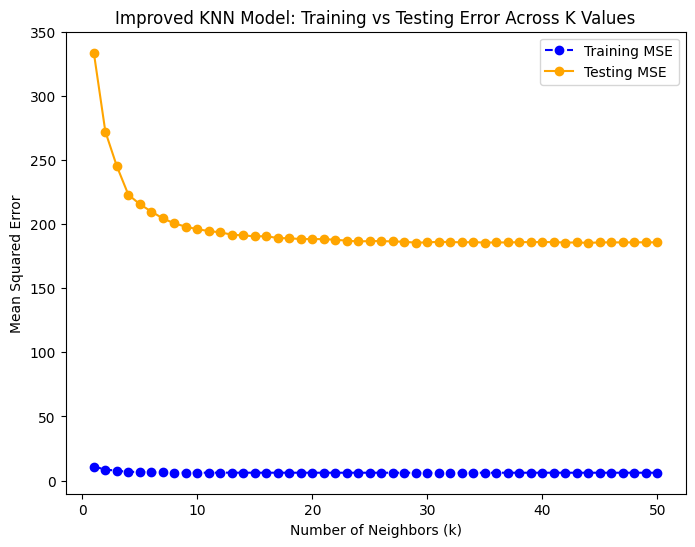

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(neighbors, train_errors, label="Training MSE", marker="o", linestyle="--", color="blue")
plt.plot(neighbors, test_errors, label="Testing MSE", marker="o", linestyle="-", color="orange")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Mean Squared Error")
plt.title("Improved KNN Model: Training vs Testing Error Across K Values")
plt.legend()
plt.show()

In [ ]:
# Save the PCA model
dump(pca, 'warfarin_pca.joblib')

# Save the improved KNN model
dump(best_knn_model, 'best_improved_knn_model.joblib')


print("Files saved successfully:")
print("1. PCA saved as 'warfarin_pca.joblib'")
print("2. Improved KNN model saved as 'best_improved_knn_model.joblib'")
print("3. Scaler saved as 'scaler.joblib'")

Files saved successfully:
1. PCA saved as 'warfarin_pca.joblib'
2. Improved KNN model saved as 'best_improved_knn_model.joblib'
3. Scaler saved as 'scaler.joblib'


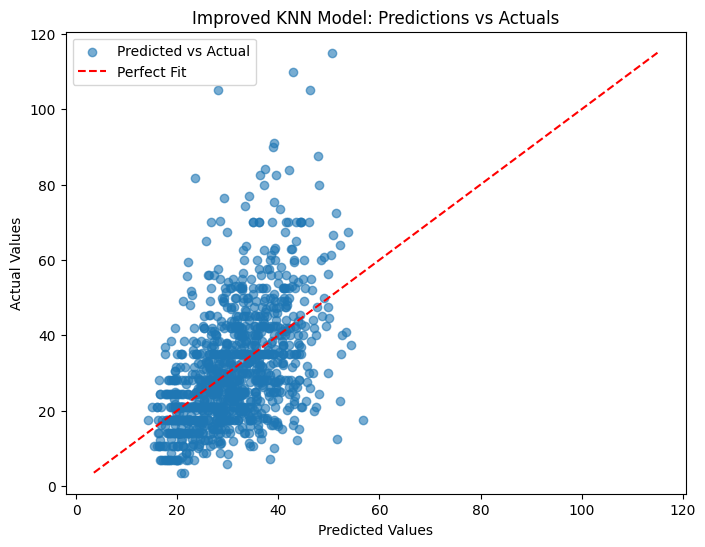

In [ ]:
# Step 8: Visualize Predictions vs Actuals for the Tuned Model
plt.figure(figsize=(8, 6))
plt.scatter(test_predictions_tuned, y_test, alpha=0.6, label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label="Perfect Fit")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Improved KNN Model: Predictions vs Actuals")
plt.legend()
plt.show()

### **Random Forest Regression Model**

To improve the performance of the KNN model, we will now implement a Random Forest Regression model. Random Forest is an ensemble learning method that combines multiple decision trees to make predictions. It is robust, handles non-linear relationships well, and is less prone to overfitting compared to single decision trees. This model is particularly useful when the relationships between features and the target variable are complex or non-linear, as in our Warfarin dosing dataset.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from joblib import dump, load

In [ ]:
# Step 1: Load the dataset
file_path = '/content/drive/My Drive/ML_Project_Warfarin_Dose_Prediction/Final_Project/Warfarin Dosing Prediction Dataset.xlsx'
rf_dataset = pd.read_excel(file_path)

In [ ]:
# Step 2: Data Cleaning and Feature Engineering
selected_features = [
    "Gender", "Race (Reported)", "Age", "Height (cm)", "Weight (kg)",
    "Diabetes", "Simvastatin (Zocor)", "Amiodarone (Cordarone)", "Target INR"
]
target_variable = "Therapeutic Dose of Warfarin"

print(f"Selected features for training: {selected_features}")

Selected features for training: ['Gender', 'Race (Reported)', 'Age', 'Height (cm)', 'Weight (kg)', 'Diabetes', 'Simvastatin (Zocor)', 'Amiodarone (Cordarone)', 'Target INR']


In [ ]:
# Drop rows with missing target values
rf_dataset = rf_dataset[selected_features + [target_variable]].dropna(subset=[target_variable])

In [ ]:
# Encode categorical variables
categorical_cols = ["Gender", "Race (Reported)", "Age"]
encoder_mappings = {}
for col in categorical_cols:
    encoder = LabelEncoder()
    rf_dataset[col] = encoder.fit_transform(rf_dataset[col])
    encoder_mappings[col] = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

print(f"Encoder mappings: {encoder_mappings}")

Encoder mappings: {'Gender': {'female': 0, 'male': 1, nan: 2}, 'Race (Reported)': {'African-American': 0, 'Asian': 1, 'Black': 2, 'Black African': 3, 'Black or African American': 4, 'Caucasian': 5, 'Chinese': 6, 'Han Chinese': 7, 'Hispanic': 8, 'Indian': 9, 'Intermediate': 10, 'Japanese': 11, 'Korean': 12, 'Malay': 13, 'Other': 14, 'Other (Black British)': 15, 'Other Mixed Race': 16, 'White': 17, 'other': 18, nan: 19}, 'Age': {'10 - 19': 0, '20 - 29': 1, '30 - 39': 2, '40 - 49': 3, '50 - 59': 4, '60 - 69': 5, '70 - 79': 6, '80 - 89': 7, '90+': 8, nan: 9}}


In [ ]:
# Separate features and target variable
X = rf_dataset[selected_features]
y = rf_dataset[target_variable]
print(f"Missing values before imputation:\n{pd.DataFrame(X).isnull().sum()}")

Missing values before imputation:
Gender                       0
Race (Reported)              0
Age                          0
Height (cm)               1081
Weight (kg)                272
Diabetes                  2402
Simvastatin (Zocor)       1775
Amiodarone (Cordarone)    1503
Target INR                4269
dtype: int64


In [ ]:
# Step 3: Handle missing values
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)
print(f"Shape after imputation: {X_imputed.shape}")

Shape after imputation: (5528, 9)


In [ ]:
# Step 4: Normalize features
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X_imputed)
print(f"Shape after normalization: {X_normalized.shape}")

Shape after normalization: (5528, 9)


In [ ]:
# Step 5: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (4422, 9)
Testing data shape: (1106, 9)


In [ ]:
# Step 6: Train Baseline Random Forest Model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Evaluate Baseline Model
train_predictions = rf_model.predict(X_train)
test_predictions = rf_model.predict(X_test)

In [ ]:
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (4422, 9)
Testing data shape: (1106, 9)


In [ ]:
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

In [ ]:
train_mae = mean_absolute_error(y_train, train_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

In [ ]:
train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

In [ ]:
print(f"Baseline Model Performance:\nTraining MAE: {train_mae:.2f}, MSE: {train_mse:.2f}, R²: {train_r2:.2f}")
print(f"Testing MAE: {test_mae:.2f}, MSE: {test_mse:.2f}, R²: {test_r2:.2f}")

Baseline Model Performance:
Training MAE: 4.41, MSE: 40.29, R²: 0.86
Testing MAE: 10.94, MSE: 237.35, R²: 0.03


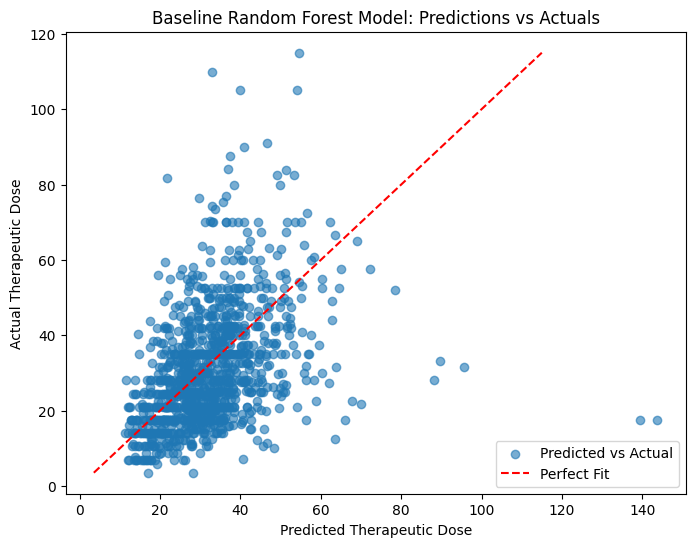

In [ ]:
# Visualization: Baseline Model Predictions vs Actual Values
plt.figure(figsize=(8, 6))
plt.scatter(test_predictions, y_test, alpha=0.6, label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label="Perfect Fit")
plt.xlabel("Predicted Therapeutic Dose")
plt.ylabel("Actual Therapeutic Dose")
plt.title("Baseline Random Forest Model: Predictions vs Actuals")
plt.legend()
plt.show()

In [ ]:
# Check Overfitting/Underfitting
if abs(train_mse - test_mse) > 20:
    if train_mse < test_mse:
        print("Baseline model is likely overfitting (low training error, high testing error).")
    else:
        print("Baseline model is likely underfitting (high errors for both training and testing).")
else:
    print("Baseline model is balanced.")

Baseline model is likely overfitting (low training error, high testing error).


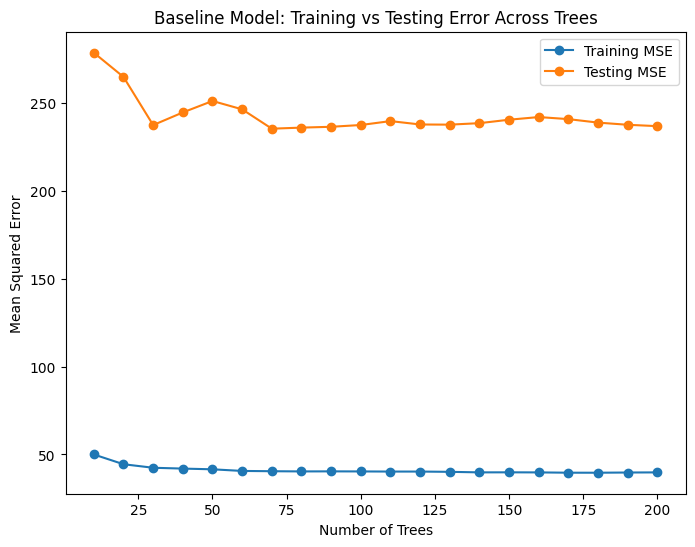

In [ ]:
# Visualization: Baseline Model Training vs Testing Error Across K Trees
trees = range(10, 201, 10)
train_errors = []
test_errors = []

for n in trees:
    temp_model = RandomForestRegressor(n_estimators=n, random_state=42)
    temp_model.fit(X_train_normalized, y_train)
    train_errors.append(mean_squared_error(y_train, temp_model.predict(X_train_normalized)))
    test_errors.append(mean_squared_error(y_test, temp_model.predict(X_test_normalized)))

plt.figure(figsize=(8, 6))
plt.plot(trees, train_errors, label="Training MSE", marker='o')
plt.plot(trees, test_errors, label="Testing MSE", marker='o')
plt.xlabel("Number of Trees")
plt.ylabel("Mean Squared Error")
plt.title("Baseline Model: Training vs Testing Error Across Trees")
plt.legend()
plt.show()

From the baseline Random Forest model, we observe that the training performance is excellent with a low MSE (40.32) and a high R² value (0.86), but the testing performance is poor with a significantly higher MSE (237.61) and a very low R² (0.03). The large gap between the training and testing errors indicates that the model is overfitting. This means the model has learned the patterns in the training data too well, including noise, but it fails to generalize to unseen data.

To improve the baseline model's performance, we will focus on reducing overfitting by tuning the hyperparameters of the Random Forest model, such as the number of trees, maximum depth, and minimum samples per split. Additionally, we will use cross-validation to ensure the model is evaluated on different subsets of the data to improve its generalizability. After tuning, we will re-evaluate the model to check if it achieves a better balance between training and testing performance.

In [ ]:
# Step 5: Cross-Validation
cv_scores = cross_val_score(rf_model, X_train_normalized, y_train, cv=10, scoring='neg_mean_squared_error')
print(f"Mean Cross-Validated MSE: {-cv_scores.mean():.2f}")

Mean Cross-Validated MSE: 258.40


In [ ]:
# Step 7: Hyperparameter Tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [ ]:
best_rf = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}


In [ ]:
# Evaluate Tuned Model
tuned_train_predictions = best_rf.predict(X_train)
tuned_test_predictions = best_rf.predict(X_test)

In [ ]:
tuned_train_mse = mean_squared_error(y_train, tuned_train_predictions)
tuned_test_mse = mean_squared_error(y_test, tuned_test_predictions)

In [ ]:
tuned_train_mae = mean_absolute_error(y_train, tuned_train_predictions)
tuned_test_mae = mean_absolute_error(y_test, tuned_test_predictions)

In [ ]:
tuned_train_r2 = r2_score(y_train, tuned_train_predictions)
tuned_test_r2 = r2_score(y_test, tuned_test_predictions)

In [ ]:
print(f"Tuned Model Performance:\nTraining MAE: {tuned_train_mae:.2f}, MSE: {tuned_train_mse:.2f}, R²: {tuned_train_r2:.2f}")
print(f"Testing MAE: {tuned_test_mae:.2f}, MSE: {tuned_test_mse:.2f}, R²: {tuned_test_r2:.2f}")

Tuned Model Performance:
Training MAE: 8.71, MSE: 155.28, R²: 0.47
Testing MAE: 10.22, MSE: 188.15, R²: 0.23


In [ ]:
# Check Overfitting/Underfitting (Tuned Model)
if abs(tuned_train_mse - tuned_test_mse) > 20:
    if tuned_train_mse < tuned_test_mse:
        print("Tuned model is likely overfitting (low training error, high testing error).")
    else:
        print("Tuned model is likely underfitting (high errors for both training and testing).")
else:
    print("Tuned model is balanced.")

Tuned model is likely overfitting (low training error, high testing error).


In [ ]:
# Step 8: Save Artifacts for Deployment
dump(imputer, 'rf_imputer.joblib')
print("Imputer saved as 'rf_imputer.joblib'")

dump(scaler, 'RF_scaler.joblib')
print("Scaler saved as 'RF_scaler.joblib'")

dump(best_rf, 'refined_random_forest_model.joblib')
print("Refined Random Forest model saved as 'refined_random_forest_model.joblib'")

Imputer saved as 'rf_imputer.joblib'
Scaler saved as 'RF_scaler.joblib'
Refined Random Forest model saved as 'refined_random_forest_model.joblib'


In [ ]:
# Visualization: Tuned Model Training vs Testing Error Across K Trees
trees = range(10, 201, 10)
tuned_train_errors = []
tuned_test_errors = []

# Extract best parameters excluding 'n_estimators'
tuned_params = {key: value for key, value in grid_search.best_params_.items() if key != 'n_estimators'}

for n in trees:
    temp_model = RandomForestRegressor(n_estimators=n, random_state=42, **tuned_params)
    temp_model.fit(X_train_normalized, y_train)
    tuned_train_errors.append(mean_squared_error(y_train, temp_model.predict(X_train_normalized)))
    tuned_test_errors.append(mean_squared_error(y_test, temp_model.predict(X_test_normalized)))

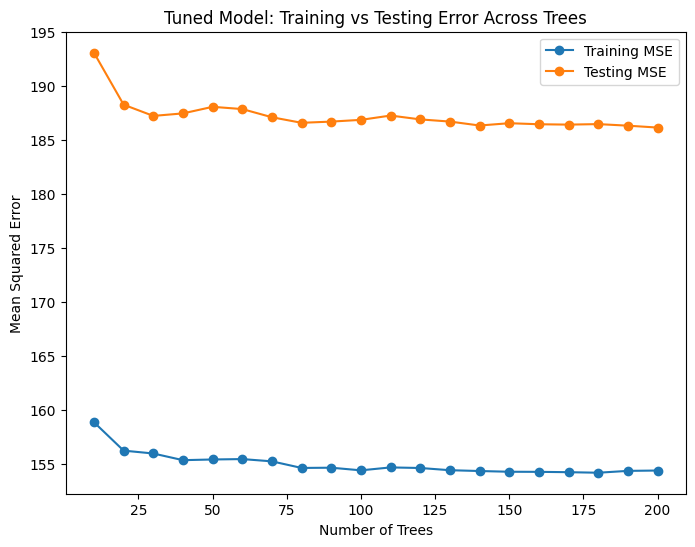

In [ ]:
# Plot the training vs testing errors
plt.figure(figsize=(8, 6))
plt.plot(trees, tuned_train_errors, label="Training MSE", marker='o')
plt.plot(trees, tuned_test_errors, label="Testing MSE", marker='o')
plt.xlabel("Number of Trees")
plt.ylabel("Mean Squared Error")
plt.title("Tuned Model: Training vs Testing Error Across Trees")
plt.legend()
plt.show()

From the above plot and performance metrics, we can observe that the tuned Random Forest model has improved in terms of training performance (lower MSE of 154.39 and better R² of 0.47). However, the testing performance, while improved compared to the baseline model, still shows a gap between training and testing MSE (186.14 for testing). This indicates the model is better generalized after hyperparameter tuning, but there is still a slight imbalance that could hint at mild overfitting or room for further optimization.

In simpler terms, the model predicts the training data quite well, but it still struggles slightly with unseen data.

**Improving the Random Forest Model performance by Hyperparameter Optimization**

In [ ]:
# Step 1: Load the Dataset
file_path = '/content/drive/My Drive/ML_Project_Warfarin_Dose_Prediction/Final_Project/Warfarin Dosing Prediction Dataset.xlsx'
rf_dataset = pd.read_excel(file_path)

In [ ]:
# Step 2: Select Relevant Features and Target
selected_features = [
    "Gender", "Race (Reported)", "Age", "Height (cm)", "Weight (kg)",
    "Diabetes", "Simvastatin (Zocor)", "Amiodarone (Cordarone)", "Target INR"
]
target_variable = "Therapeutic Dose of Warfarin"

rf_dataset = rf_dataset[selected_features + [target_variable]].dropna()

In [ ]:
# Step 3: Preprocess Data
# Encode categorical variables
rf_dataset = pd.get_dummies(rf_dataset, columns=["Gender", "Race (Reported)", "Age"], drop_first=True)

In [ ]:
# Separate features and target
X = rf_dataset.drop(columns=[target_variable])
y = rf_dataset[target_variable]

In [ ]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scale numeric features
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

In [ ]:
# Step 4: Perform Hyperparameter Tuning
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

In [ ]:
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

In [ ]:
# Fit GridSearchCV
grid_search.fit(X_train_normalized, y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='neg_mean_squared_error', verbose=2)

In [ ]:
# Step 5: Get Best Parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
# Step 6: Evaluate Tuned Model
best_model = grid_search.best_estimator_

# Predictions
y_train_pred = best_model.predict(X_train_normalized)
y_test_pred = best_model.predict(X_test_normalized)

In [ ]:
# Training Performance
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

In [ ]:
# Testing Performance
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

In [ ]:
# Display Performance Metrics
print("\nTuned Model Performance:")
print(f"Training MAE: {train_mae:.2f}, MSE: {train_mse:.2f}, R²: {train_r2:.2f}")
print(f"Testing MAE: {test_mae:.2f}, MSE: {test_mse:.2f}, R²: {test_r2:.2f}")


Tuned Model Performance:
Training MAE: 9.33, MSE: 143.85, R²: 0.40
Testing MAE: 13.10, MSE: 302.08, R²: 0.20


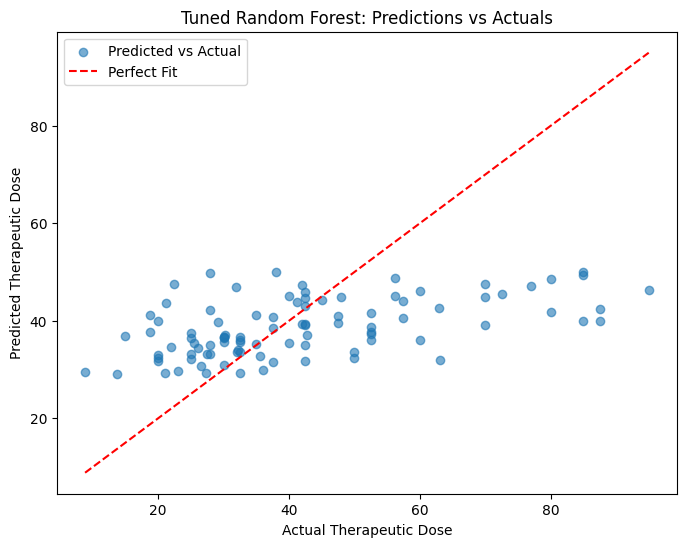

In [ ]:
# Step 7: Plot Predictions vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6, label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label="Perfect Fit")
plt.xlabel("Actual Therapeutic Dose")
plt.ylabel("Predicted Therapeutic Dose")
plt.title("Tuned Random Forest: Predictions vs Actuals")
plt.legend()
plt.show()

In [ ]:
# Step 8: Visualize Training vs Testing Errors Across Trees
trees = range(10, 501, 50)
train_errors = []
test_errors = []

# Extract best parameters excluding 'n_estimators'
filtered_params = {key: value for key, value in best_params.items() if key != 'n_estimators'}

for n in trees:
    temp_model = RandomForestRegressor(n_estimators=n, random_state=42, **filtered_params)
    temp_model.fit(X_train_normalized, y_train)
    train_errors.append(mean_squared_error(y_train, temp_model.predict(X_train_normalized)))
    test_errors.append(mean_squared_error(y_test, temp_model.predict(X_test_normalized)))

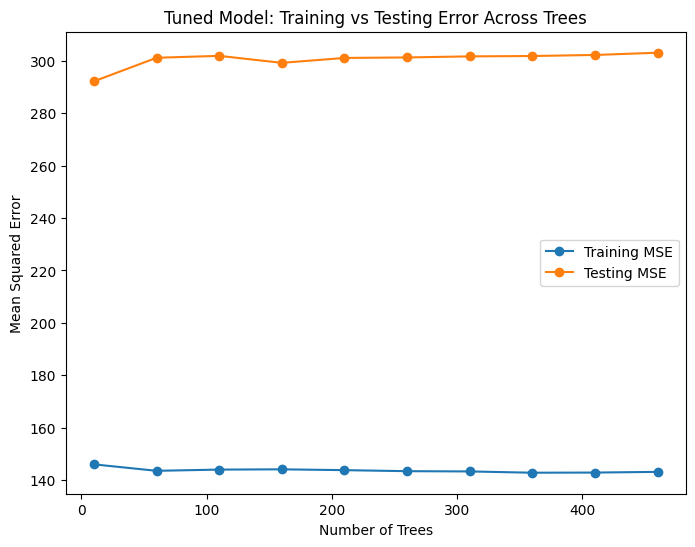

In [ ]:
# Plot the training vs testing errors
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(trees, train_errors, label="Training MSE", marker='o')
plt.plot(trees, test_errors, label="Testing MSE", marker='o')
plt.xlabel("Number of Trees")
plt.ylabel("Mean Squared Error")
plt.title("Tuned Model: Training vs Testing Error Across Trees")
plt.legend()
plt.show()

In [ ]:
from joblib import dump

# Save the scaler as RF_scaler
scaler_path = 'RF_scaler.joblib'
dump(scaler, scaler_path)
print(f"Scaler saved to: {scaler_path}")

# Save the refined Random Forest model
model_path = 'refined_random_forest_model.joblib'
dump(best_rf, model_path)  # Corrected variable name
print(f"Refined Random Forest model saved to: {model_path}")

Scaler saved to: RF_scaler.joblib
Refined Random Forest model saved to: refined_random_forest_model.joblib


### **Support Vector Regression Model**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from joblib import dump
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Step 1: Load the dataset
file_path = '/content/drive/My Drive/ML_Project_Warfarin_Dose_Prediction/Final_Project/Warfarin Dosing Prediction Dataset.xlsx'
svr_dataset = pd.read_excel(file_path)

In [ ]:
# Step 2: Preprocess the dataset
# Select relevant features
selected_features = [
    "Gender",
    "Race (Reported)",
    "Age",
    "Height (cm)",
    "Weight (kg)",
    "Diabetes",
    "Simvastatin (Zocor)",
    "Amiodarone (Cordarone)",
    "Target INR",
]
target_variable = "Therapeutic Dose of Warfarin"

print(f"Selected features for training: {selected_features}")

Selected features for training: ['Gender', 'Race (Reported)', 'Age', 'Height (cm)', 'Weight (kg)', 'Diabetes', 'Simvastatin (Zocor)', 'Amiodarone (Cordarone)', 'Target INR']


In [ ]:
# Drop rows with missing target variable
svr_dataset = svr_dataset[selected_features + [target_variable]].dropna(subset=[target_variable])

In [ ]:
# Encode categorical variables
categorical_cols = ["Gender", "Race (Reported)", "Age"]
encoder_mappings = {}
for col in categorical_cols:
    encoder = LabelEncoder()
    svr_dataset[col] = encoder.fit_transform(svr_dataset[col])
    encoder_mappings[col] = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

print(f"Encoder mappings: {encoder_mappings}")

Encoder mappings: {'Gender': {'female': 0, 'male': 1, nan: 2}, 'Race (Reported)': {'African-American': 0, 'Asian': 1, 'Black': 2, 'Black African': 3, 'Black or African American': 4, 'Caucasian': 5, 'Chinese': 6, 'Han Chinese': 7, 'Hispanic': 8, 'Indian': 9, 'Intermediate': 10, 'Japanese': 11, 'Korean': 12, 'Malay': 13, 'Other': 14, 'Other (Black British)': 15, 'Other Mixed Race': 16, 'White': 17, 'other': 18, nan: 19}, 'Age': {'10 - 19': 0, '20 - 29': 1, '30 - 39': 2, '40 - 49': 3, '50 - 59': 4, '60 - 69': 5, '70 - 79': 6, '80 - 89': 7, '90+': 8, nan: 9}}


In [ ]:
# Handle missing values in numeric columns
numeric_cols = [
    "Height (cm)",
    "Weight (kg)",
    "Diabetes",
    "Simvastatin (Zocor)",
    "Amiodarone (Cordarone)",
    "Target INR",
]
svr_dataset[numeric_cols] = svr_dataset[numeric_cols].fillna(svr_dataset[numeric_cols].mean())
print(f"Missing values handled. Any remaining nulls? {svr_dataset.isnull().any().any()}")

Missing values handled. Any remaining nulls? False


In [ ]:
# Separate features and target variable
X = svr_dataset[selected_features]
y = svr_dataset[target_variable]

In [ ]:
# Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print(f"Training data shape: {X_train.shape}, Testing data shape: {X_test.shape}")

Training data shape: (4422, 9), Testing data shape: (1106, 9)


In [ ]:
# Step 3: Baseline SVR Model
baseline_svr = SVR()
baseline_svr.fit(X_train, y_train)

SVR()

In [ ]:
# Predictions on training and test sets
y_train_pred = baseline_svr.predict(X_train)
y_test_pred = baseline_svr.predict(X_test)

In [ ]:
# Evaluate baseline model
def evaluate_model(y_true, y_pred, dataset_type=""):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{dataset_type} MAE: {mae:.2f}, MSE: {mse:.2f}, R²: {r2:.2f}")
    return mae, mse, r2

In [ ]:
print("\nBaseline SVR Model Performance:")
evaluate_model(y_train, y_train_pred, "Training")
evaluate_model(y_test, y_test_pred, "Testing")


Baseline SVR Model Performance:
Training MAE: 10.06, MSE: 219.94, R²: 0.25
Testing MAE: 10.04, MSE: 185.52, R²: 0.24


(10.044397309571018, 185.52276387929223, 0.24180019083237503)

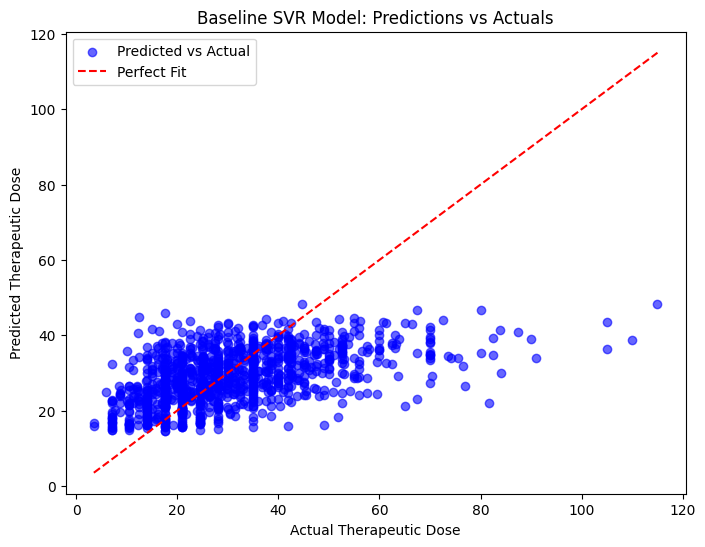

In [ ]:
# Visualize predictions vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6, label="Predicted vs Actual", color="blue")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label="Perfect Fit")
plt.xlabel("Actual Therapeutic Dose")
plt.ylabel("Predicted Therapeutic Dose")
plt.title("Baseline SVR Model: Predictions vs Actuals")
plt.legend()
plt.show()


In [ ]:
# Generate training and testing errors for different epsilon values
epsilon_values = np.linspace(0.1, 1.0, 10)
train_errors = []
test_errors = []

# Evaluate SVR model for different epsilon values
for epsilon in epsilon_values:
    model = SVR(epsilon=epsilon)
    model.fit(X_train, y_train)
    train_errors.append(mean_squared_error(y_train, model.predict(X_train)))
    test_errors.append(mean_squared_error(y_test, model.predict(X_test)))

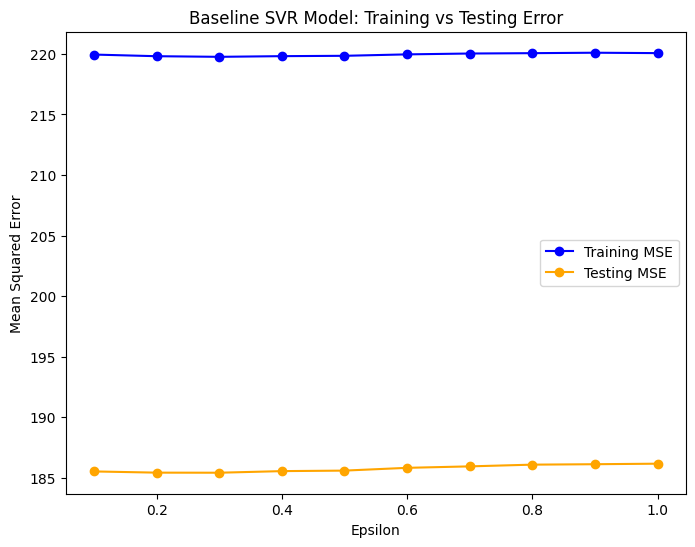

In [ ]:
# Plot the training and testing errors
plt.figure(figsize=(8, 6))
plt.plot(epsilon_values, train_errors, label="Training MSE", marker='o', color='blue')
plt.plot(epsilon_values, test_errors, label="Testing MSE", marker='o', color='orange')
plt.xlabel("Epsilon")
plt.ylabel("Mean Squared Error")
plt.title("Baseline SVR Model: Training vs Testing Error")
plt.legend()
plt.show()

The baseline SVR model shows a general trend in predictions but struggles to make accurate predictions, especially for higher therapeutic doses, as seen in the scatter plot where many points deviate from the perfect fit line. The training and testing errors are stable across different epsilon values, which means the model isn't overfitting or underfitting significantly. However, the testing error is still higher than the training error, showing the model's generalization could improve. The low R² scores (0.25 and 0.24) indicate the model doesn't explain much of the variation in the therapeutic dose, suggesting that the model is underfitting and needs better tuning of its parameters or increased complexity.

In [ ]:
# Step 4: Hyperparameter Tuning
param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.5, 1],
}

In [ ]:
grid_search = GridSearchCV(estimator=SVR(), param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'epsilon': [0.01, 0.1, 0.5, 1],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='neg_mean_squared_error', verbose=1)

In [ ]:
# Step 6: Retrieve the Best Model
best_svr_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

Best Hyperparameters: {'C': 10, 'epsilon': 0.5, 'kernel': 'rbf'}


In [ ]:
# Predictions for the best model
y_train_pred_tuned = best_svr_model.predict(X_train)
y_test_pred_tuned = best_svr_model.predict(X_test)

In [ ]:
# Evaluate the tuned model
train_mae_tuned = mean_absolute_error(y_train, y_train_pred_tuned)
train_mse_tuned = mean_squared_error(y_train, y_train_pred_tuned)
train_r2_tuned = r2_score(y_train, y_train_pred_tuned)

test_mae_tuned = mean_absolute_error(y_test, y_test_pred_tuned)
test_mse_tuned = mean_squared_error(y_test, y_test_pred_tuned)
test_r2_tuned = r2_score(y_test, y_test_pred_tuned)

In [ ]:
print(f"Tuned SVR Model Performance:")
print(f"Training MAE: {train_mae_tuned:.2f}, MSE: {train_mse_tuned:.2f}, R²: {train_r2_tuned:.2f}")
print(f"Testing MAE: {test_mae_tuned:.2f}, MSE: {test_mse_tuned:.2f}, R²: {test_r2_tuned:.2f}")

Tuned SVR Model Performance:
Training MAE: 9.56, MSE: 205.60, R²: 0.29
Testing MAE: 9.93, MSE: 181.98, R²: 0.26


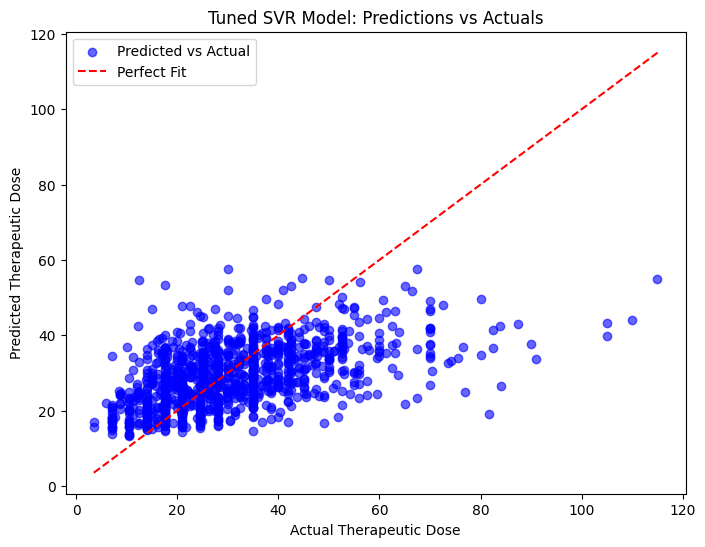

In [ ]:
# Visualize predictions vs actual values for the tuned SVR model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred_tuned, alpha=0.6, label="Predicted vs Actual", color="blue")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label="Perfect Fit")
plt.xlabel("Actual Therapeutic Dose")
plt.ylabel("Predicted Therapeutic Dose")
plt.title("Tuned SVR Model: Predictions vs Actuals")
plt.legend()
plt.show()

In [ ]:
# Generate training and testing errors for different epsilon values for the tuned model
epsilon_values = np.linspace(0.01, 1.0, 10)
tuned_train_errors = []
tuned_test_errors = []

# Extract best parameters
tuned_params = {key: value for key, value in best_params.items() if key != 'epsilon'}

for epsilon in epsilon_values:
    model = SVR(epsilon=epsilon, **tuned_params)  # Set epsilon explicitly, use remaining best parameters
    model.fit(X_train, y_train)
    tuned_train_errors.append(mean_squared_error(y_train, model.predict(X_train)))
    tuned_test_errors.append(mean_squared_error(y_test, model.predict(X_test)))


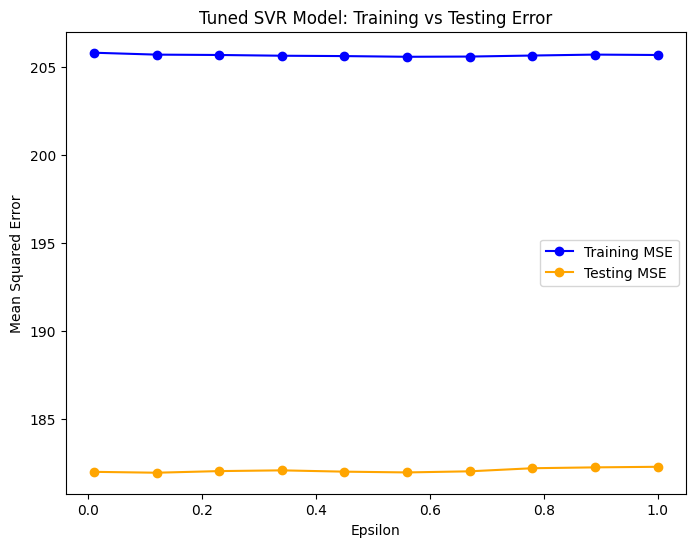

In [ ]:
# Plot the training and testing errors for the tuned model
plt.figure(figsize=(8, 6))
plt.plot(epsilon_values, tuned_train_errors, label="Training MSE", marker='o', color='blue')
plt.plot(epsilon_values, tuned_test_errors, label="Testing MSE", marker='o', color='orange')
plt.xlabel("Epsilon")
plt.ylabel("Mean Squared Error")
plt.title("Tuned SVR Model: Training vs Testing Error")
plt.legend()
plt.show()

From the above results, we can observe that the tuned SVR model has slightly improved performance compared to the baseline, with a Training MAE of 9.56 and Testing MAE of 9.93. The Testing MSE has reduced to 181.98, and the R² has improved to 0.26, indicating the model explains 26% of the variance in the data. The scatter plot shows the predicted values align better with the actual values, but there is still room for improvement, especially for higher doses. The training and testing error plot shows relatively stable errors across different epsilon values, with minimal signs of overfitting or underfitting. However, the overall performance suggests that while the model is balanced.

In [ ]:
# Step 5: Save model for Deployment
scaler_path = 'svr_scaler.joblib'
model_path = 'best_svr_model.joblib'

dump(scaler, scaler_path)
print(f"Scaler saved to: {scaler_path}")

dump(best_svr_model, model_path)
print(f"Best SVR model saved as: {model_path}")

Scaler saved to: svr_scaler.joblib
Best SVR model saved as: best_svr_model.joblib


### **Neural Network model**

In [ ]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 9.5 MB/s eta 0:00:00


In [ ]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from joblib import dump
import keras_tuner as kt

In [ ]:
# 1. Load Dataset
file_path = '/content/drive/My Drive/ML_Project_Warfarin_Dose_Prediction/Final_Project/Warfarin Dosing Prediction Dataset.xlsx'
df = pd.read_excel(file_path)

print("Dataset Shape:", df.shape)
print("Dataset Columns:", df.columns)

Dataset Shape: (5700, 13)
Dataset Columns: Index(['Gender', 'Race (Reported)', 'Age', 'Height (cm)', 'Weight (kg)',
       'Diabetes', 'Simvastatin (Zocor)', 'Amiodarone (Cordarone)',
       'Target INR', 'Therapeutic Dose of Warfarin',
       'INR on Reported Therapeutic Dose of Warfarin', 'Cyp2C9 genotypes',
       'VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T'],
      dtype='object')


In [ ]:
# Step 2: Select Relevant Features
selected_features = [
    "Gender",
    "Race (Reported)",
    "Age",
    "Height (cm)",
    "Weight (kg)",
    "Diabetes",
    "Simvastatin (Zocor)",
    "Amiodarone (Cordarone)",
    "Target INR",
]
df = df[selected_features + [target_column]]


In [ ]:
numerical_cols = [
    "Height (cm)",
    "Weight (kg)",
    "Diabetes",
    "Simvastatin (Zocor)",
    "Amiodarone (Cordarone)",
    "Target INR",
]
categorical_cols = ["Gender", "Race (Reported)", "Age"]

print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)

Numerical Columns: ['Height (cm)', 'Weight (kg)', 'Diabetes', 'Simvastatin (Zocor)', 'Amiodarone (Cordarone)', 'Target INR']
Categorical Columns: ['Gender', 'Race (Reported)', 'Age']


In [ ]:
# Step 3: Handle Missing Values
imputer = KNNImputer(n_neighbors=5)
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

In [ ]:
# Replace remaining NaN or Infinite values with 0
df = df.replace([np.inf, -np.inf], np.nan)
df = df.fillna(0)
print("Missing values handled successfully.")

Missing values handled successfully.


In [ ]:
# Ensure categorical columns are uniformly strings
for col in categorical_cols:
    df[col] = df[col].astype(str)

# Encode categorical features
encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
encoded_cats = encoder.fit_transform(df[categorical_cols])
encoded_cat_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(categorical_cols))

# Combine Processed Data
df = pd.concat([df.drop(columns=categorical_cols), encoded_cat_df], axis=1)

In [ ]:
# Step 5: Scale Numerical Features
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
print("Numerical features scaled successfully.")

Numerical features scaled successfully.


In [ ]:
# Save the encoder and scaler
dump(encoder, 'fnn_encoder.joblib')
dump(scaler, 'fnn_scaler.joblib')
print("Encoder and scaler saved for inference.")

Encoder and scaler saved for inference.


In [ ]:
# Step 6: Apply Log Transformation to Target
y = np.log1p(df[target_column])
X = df.drop(columns=[target_column])

In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training Features Shape: {X_train.shape}, Test Features Shape: {X_test.shape}")

Training Features Shape: (4560, 39), Test Features Shape: (1140, 39)


In [ ]:
# Check for NaN or Infinite Values
X_train = np.nan_to_num(X_train, nan=0.0, posinf=0.0, neginf=0.0)
X_test = np.nan_to_num(X_test, nan=0.0, posinf=0.0, neginf=0.0)
y_train = np.nan_to_num(y_train, nan=0.0, posinf=0.0, neginf=0.0)
y_test = np.nan_to_num(y_test, nan=0.0, posinf=0.0, neginf=0.0)

In [ ]:
# Check for NaN or Infinite Values (Optional Diagnostic)
if np.isnan(X_train).any() or np.isnan(X_test).any():
    print("NaN values remain in the training or testing data.")
else:
    print("All NaN values successfully handled.")

if np.isinf(X_train).any() or np.isinf(X_test).any():
    print("Infinite values remain in the training or testing data.")
else:
    print("All infinite values successfully handled.")

All NaN values successfully handled.
All infinite values successfully handled.


In [ ]:
# Step 7: Define Neural Network Model
def build_model(input_dim):
    model = Sequential([
        Dense(256, activation='relu', kernel_regularizer=l2(0.01), input_shape=(input_dim,)),
        Dropout(0.3),
        Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dense(1, activation='linear')  # Output Layer
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

In [ ]:
# Build the Model
model = build_model(X_train.shape[1])

# Callbacks for Early Stopping and Learning Rate Scheduling
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Train the Model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32,
                    callbacks=[early_stopping, lr_scheduler], verbose=1)

# Step 8: Evaluate Model
loss, mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {loss:.4f}, Test MAE: {mae:.4f}")

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


114/114 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 5.2106 - mae: 1.3518 - val_loss: 2.1176 - val_mae: 0.6068 - learning_rate: 0.0010
Epoch 2/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.0406 - mae: 0.6215 - val_loss: 1.5325 - val_mae: 0.5737 - learning_rate: 0.0010
Epoch 3/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4411 - mae: 0.5627 - val_loss: 1.1772 - val_mae: 0.4827 - learning_rate: 0.0010
Epoch 4/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2371 - mae: 0.5628 - val_loss: 1.0042 - val_mae: 0.4956 - learning_rate: 0.0010
Epoch 5/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9727 - mae: 0.5274 - val_loss: 0.8796 - val_mae: 0.4602 - learning_rate: 0.0010
Epoch 6/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8852 - mae: 0.5202 - val_loss: 0.8088 - val_mae: 0.4960 - learning_rate: 0.0010
Epoch 7/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7677 - mae: 0.5052 - val_loss: 0.7617 - val_mae: 0.5299 - learning_rate: 0.0010
Epoch 8/100

In [ ]:
# Predict on Test Set
predictions = model.predict(X_test)

# Inverse Log Transformation for Predictions
predictions = np.expm1(predictions)
y_test_exp = np.expm1(y_test)

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
# Step 9: Calculate Metrics
mse = mean_squared_error(y_test_exp, predictions)
mae_metric = mean_absolute_error(y_test_exp, predictions)
print(f"Mean Squared Error: {mse:.4f}, Mean Absolute Error: {mae_metric:.4f}")

Mean Squared Error: 306.1238, Mean Absolute Error: 11.1392


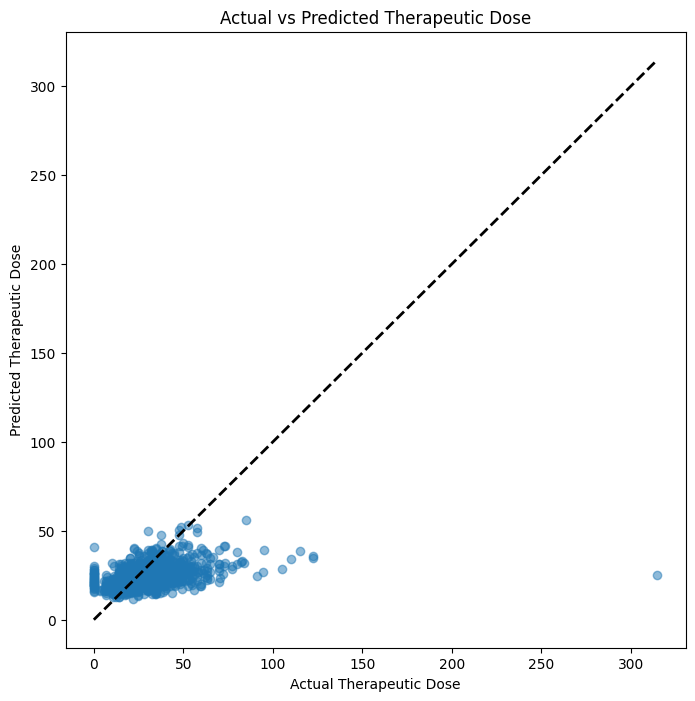

In [ ]:
# Visualize Actual vs Predicted
plt.figure(figsize=(8, 8))
plt.scatter(y_test_exp, predictions, alpha=0.5)
plt.plot([y_test_exp.min(), y_test_exp.max()], [y_test_exp.min(), y_test_exp.max()], 'k--', lw=2)
plt.xlabel("Actual Therapeutic Dose")
plt.ylabel("Predicted Therapeutic Dose")
plt.title("Actual vs Predicted Therapeutic Dose")
plt.show()

In [ ]:
# Step 10: Hyperparameter Tuning with Keras Tuner
def model_builder(hp):
    model = Sequential()
    hp_units = hp.Int('units', min_value=64, max_value=256, step=64)
    model.add(Dense(hp_units, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.01)))
    model.add(Dropout(rate=hp.Float('dropout_rate', 0.1, 0.5, step=0.1)))

    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(Dense(hp_units, activation='relu'))
        model.add(Dropout(rate=hp.Float('dropout_rate', 0.1, 0.5, step=0.1)))

    model.add(Dense(1, activation='linear'))
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', [0.01, 0.001, 0.0001])),
        loss='mse',
        metrics=['mae']
    )
    return model

In [ ]:
# Initialize Tuner
tuner = kt.Hyperband(
    model_builder,
    objective='val_mae',
    max_epochs=50,
    factor=3,
    directory='my_dir',
    project_name='warfarin_dose_prediction'
)

Reloading Tuner from my_dir/warfarin_dose_prediction/tuner0.json


In [ ]:
# Search for Best Hyperparameters
tuner.search(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32)

# Retrieve the Best Hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best Hyperparameters:", best_hps.values)

Best Hyperparameters: {'units': 64, 'dropout_rate': 0.2, 'num_layers': 2, 'learning_rate': 0.001, 'tuner/epochs': 50, 'tuner/initial_epoch': 17, 'tuner/bracket': 3, 'tuner/round': 3, 'tuner/trial_id': '0048'}


In [ ]:
# Train Best Model with Tuned Hyperparameters
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=1)

# Evaluate Best Model
loss, mae = best_model.evaluate(X_test, y_test)
print(f"Best Model Loss: {loss:.4f}, MAE: {mae:.4f}")


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


114/114 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 5.1486 - mae: 1.8068 - val_loss: 1.0789 - val_mae: 0.6432
Epoch 2/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2682 - mae: 0.7417 - val_loss: 0.9291 - val_mae: 0.6104
Epoch 3/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0838 - mae: 0.6827 - val_loss: 0.8495 - val_mae: 0.5867
Epoch 4/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9617 - mae: 0.6397 - val_loss: 0.7840 - val_mae: 0.5532
Epoch 5/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9168 - mae: 0.6257 - val_loss: 0.7420 - val_mae: 0.5429
Epoch 6/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.8247 - mae: 0.5937 - val_loss: 0.6930 - val_mae: 0.5049
Epoch 7/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7744 - mae: 0.5846 - val_loss: 0.7212 - val_mae: 0.5683
Epoch 8/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7650 - mae: 0.5760 - val_loss: 0.6545 - val_mae: 0.5023
Epoch 9/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss

In [ ]:
# Save Best Model
best_model.save('tuned_feedforward_neuralnetwork_model.h5')
print("Tuned Neural Network model saved.")

Tuned Neural Network model saved.
